### Name : Neeharika Ramanujula

# LGM VIP Task 3 : Prediction using Decision Tree  Algorithm


## Aim : Create the Decision Tree classifier and visualize it graphically.

### Importing Modules
import all the necessary libraries

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading dataset using pandas
read the dataset and assign it to df. Whenever df is called the dataset is displayed.

In [23]:
df = pd.read_csv("C:/Users/lenovo/Documents/ds_intern/Task_3/iris.csv",index_col='Id')
print(df)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
Id                                                                           
1              5.1           3.5            1.4           0.2     Iris-setosa
2              4.9           3.0            1.4           0.2     Iris-setosa
3              4.7           3.2            1.3           0.2     Iris-setosa
4              4.6           3.1            1.5           0.2     Iris-setosa
5              5.0           3.6            1.4           0.2     Iris-setosa
..             ...           ...            ...           ...             ...
146            6.7           3.0            5.2           2.3  Iris-virginica
147            6.3           2.5            5.0           1.9  Iris-virginica
148            6.5           3.0            5.2           2.0  Iris-virginica
149            6.2           3.4            5.4           2.3  Iris-virginica
150            5.9           3.0            5.1           1.8  I

In [24]:
df.head() # it displays the first 5 values from the given dataset

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [25]:
df.describe() #it describs the data by giving us count, mean, minimum and maximum value of all feature columns.

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [26]:
# gives us information about each column. 
# Here in our dataset all features like sepal width, petal width have float datatype and species have an object datatype.
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [27]:
df['Species'].value_counts()
#iris is a balanced dataset as the no.of data points for every class is same that is 50.

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

In [28]:
df.isnull().sum() # this is to check if there are any null values in the data. As it is shown there are no null values here.

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Data Visualisation
This is to observe the data in a graphical manner using pairplot from seaborn library. Here we can observe that sepelwidth does not determine the species as clearly as the other features do. In other features we can differenciate the three different clusters clearly.

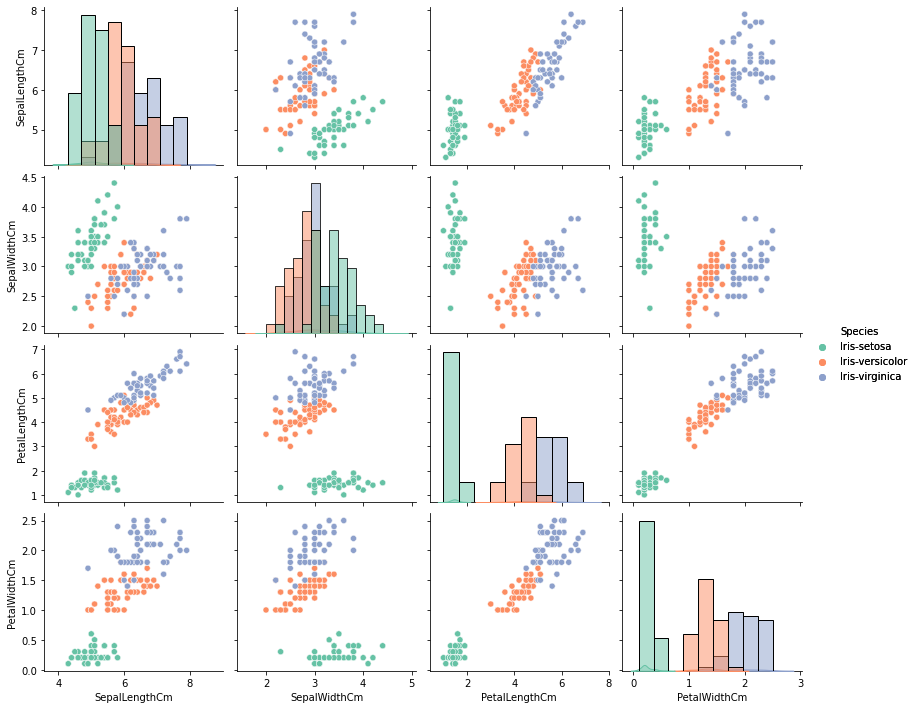

In [29]:
p=sns.pairplot(df, hue = 'Species', palette="Set2")
p.map_diag(sns.histplot)
p.map_offdiag(sns.scatterplot)
p.add_legend()

## Seperating the data 
Here we have taken 2 variables x and y. We have assigned all the features to x variable and only the species column to y variable and print the initial 5 values of x and y.

In [30]:
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

x = df.loc[:, features].values
y = df.loc[:,['Species']].values
print("x first 5 values:\n",x[:5])
print("y first 5 values:\n",y[:5])

x first 5 values:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
y first 5 values:
 [['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']]


### Splitting data into training and testing
Then we split the data into training and testing model using train_test_split from sklearn.model_selection. The test size 0.30 determines that 30% of the dataset will be used to test the model and 70% will be used to train the model.

In [31]:
from sklearn.model_selection import train_test_split
y=df['Species']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30) 

### Decision Tree
import the libraries used for decision tree clasification.

In [32]:
from sklearn.tree import  DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [33]:
classifier = DecisionTreeClassifier(criterion ='entropy', max_depth =4)

In [34]:
classifier.fit(x_train, y_train) #training the classifier

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [35]:
y_pred  = classifier.predict(x_test) #making predictions for the testing model

In [36]:
print(classification_report(y_test,   y_pred)) #Summary of the predictions made by the classifier

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.86      1.00      0.92        12
 Iris-virginica       1.00      0.89      0.94        18

       accuracy                           0.96        45
      macro avg       0.95      0.96      0.95        45
   weighted avg       0.96      0.96      0.96        45



In [37]:
print(confusion_matrix(y_test, y_pred)) #to evaluate the quality of the output

[[15  0  0]
 [ 0 12  0]
 [ 0  2 16]]


In [38]:
print('accuracy   is',accuracy_score(y_pred,y_test)) #Accuracy score. Here we have got 95% accuracy.

accuracy   is 0.9555555555555556


### Decision tree visualization
using sklearn we visualize our decision tree model. Here in the below figure we can see different features with the conditions and entropy values, the number of samples and the class in each and every block of the tree. When we see our first block, here if our value of petalwidth is lessthan or equal to 2.45 then it will give us iris-setosa as the Specie but if not then we move towards the next block. Similarly the values given by the user are checked with the conditions given and accordingly the Species of that particular flower is determined.

[Text(1162.5, 2038.5, 'Species <= 0.8\nentropy = 1.585\nsamples = 150\nvalue = [50, 50, 50]\nclass = Iris-setosa'),
 Text(983.6538461538461, 1585.5, 'entropy = 0.0\nsamples = 50\nvalue = [50, 0, 0]\nclass = Iris-setosa'),
 Text(1341.3461538461538, 1585.5, 'Species <= 1.75\nentropy = 1.0\nsamples = 100\nvalue = [0, 50, 50]\nclass = Iris-versicolor'),
 Text(715.3846153846154, 1132.5, 'PetalWidthCm <= 4.95\nentropy = 0.445\nsamples = 54\nvalue = [0, 49, 5]\nclass = Iris-versicolor'),
 Text(357.6923076923077, 679.5, 'Species <= 1.65\nentropy = 0.146\nsamples = 48\nvalue = [0, 47, 1]\nclass = Iris-versicolor'),
 Text(178.84615384615384, 226.5, 'entropy = 0.0\nsamples = 47\nvalue = [0, 47, 0]\nclass = Iris-versicolor'),
 Text(536.5384615384615, 226.5, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = Iris-virginica'),
 Text(1073.076923076923, 679.5, 'Species <= 1.55\nentropy = 0.918\nsamples = 6\nvalue = [0, 2, 4]\nclass = Iris-virginica'),
 Text(894.2307692307692, 226.5, 'entropy = 0.

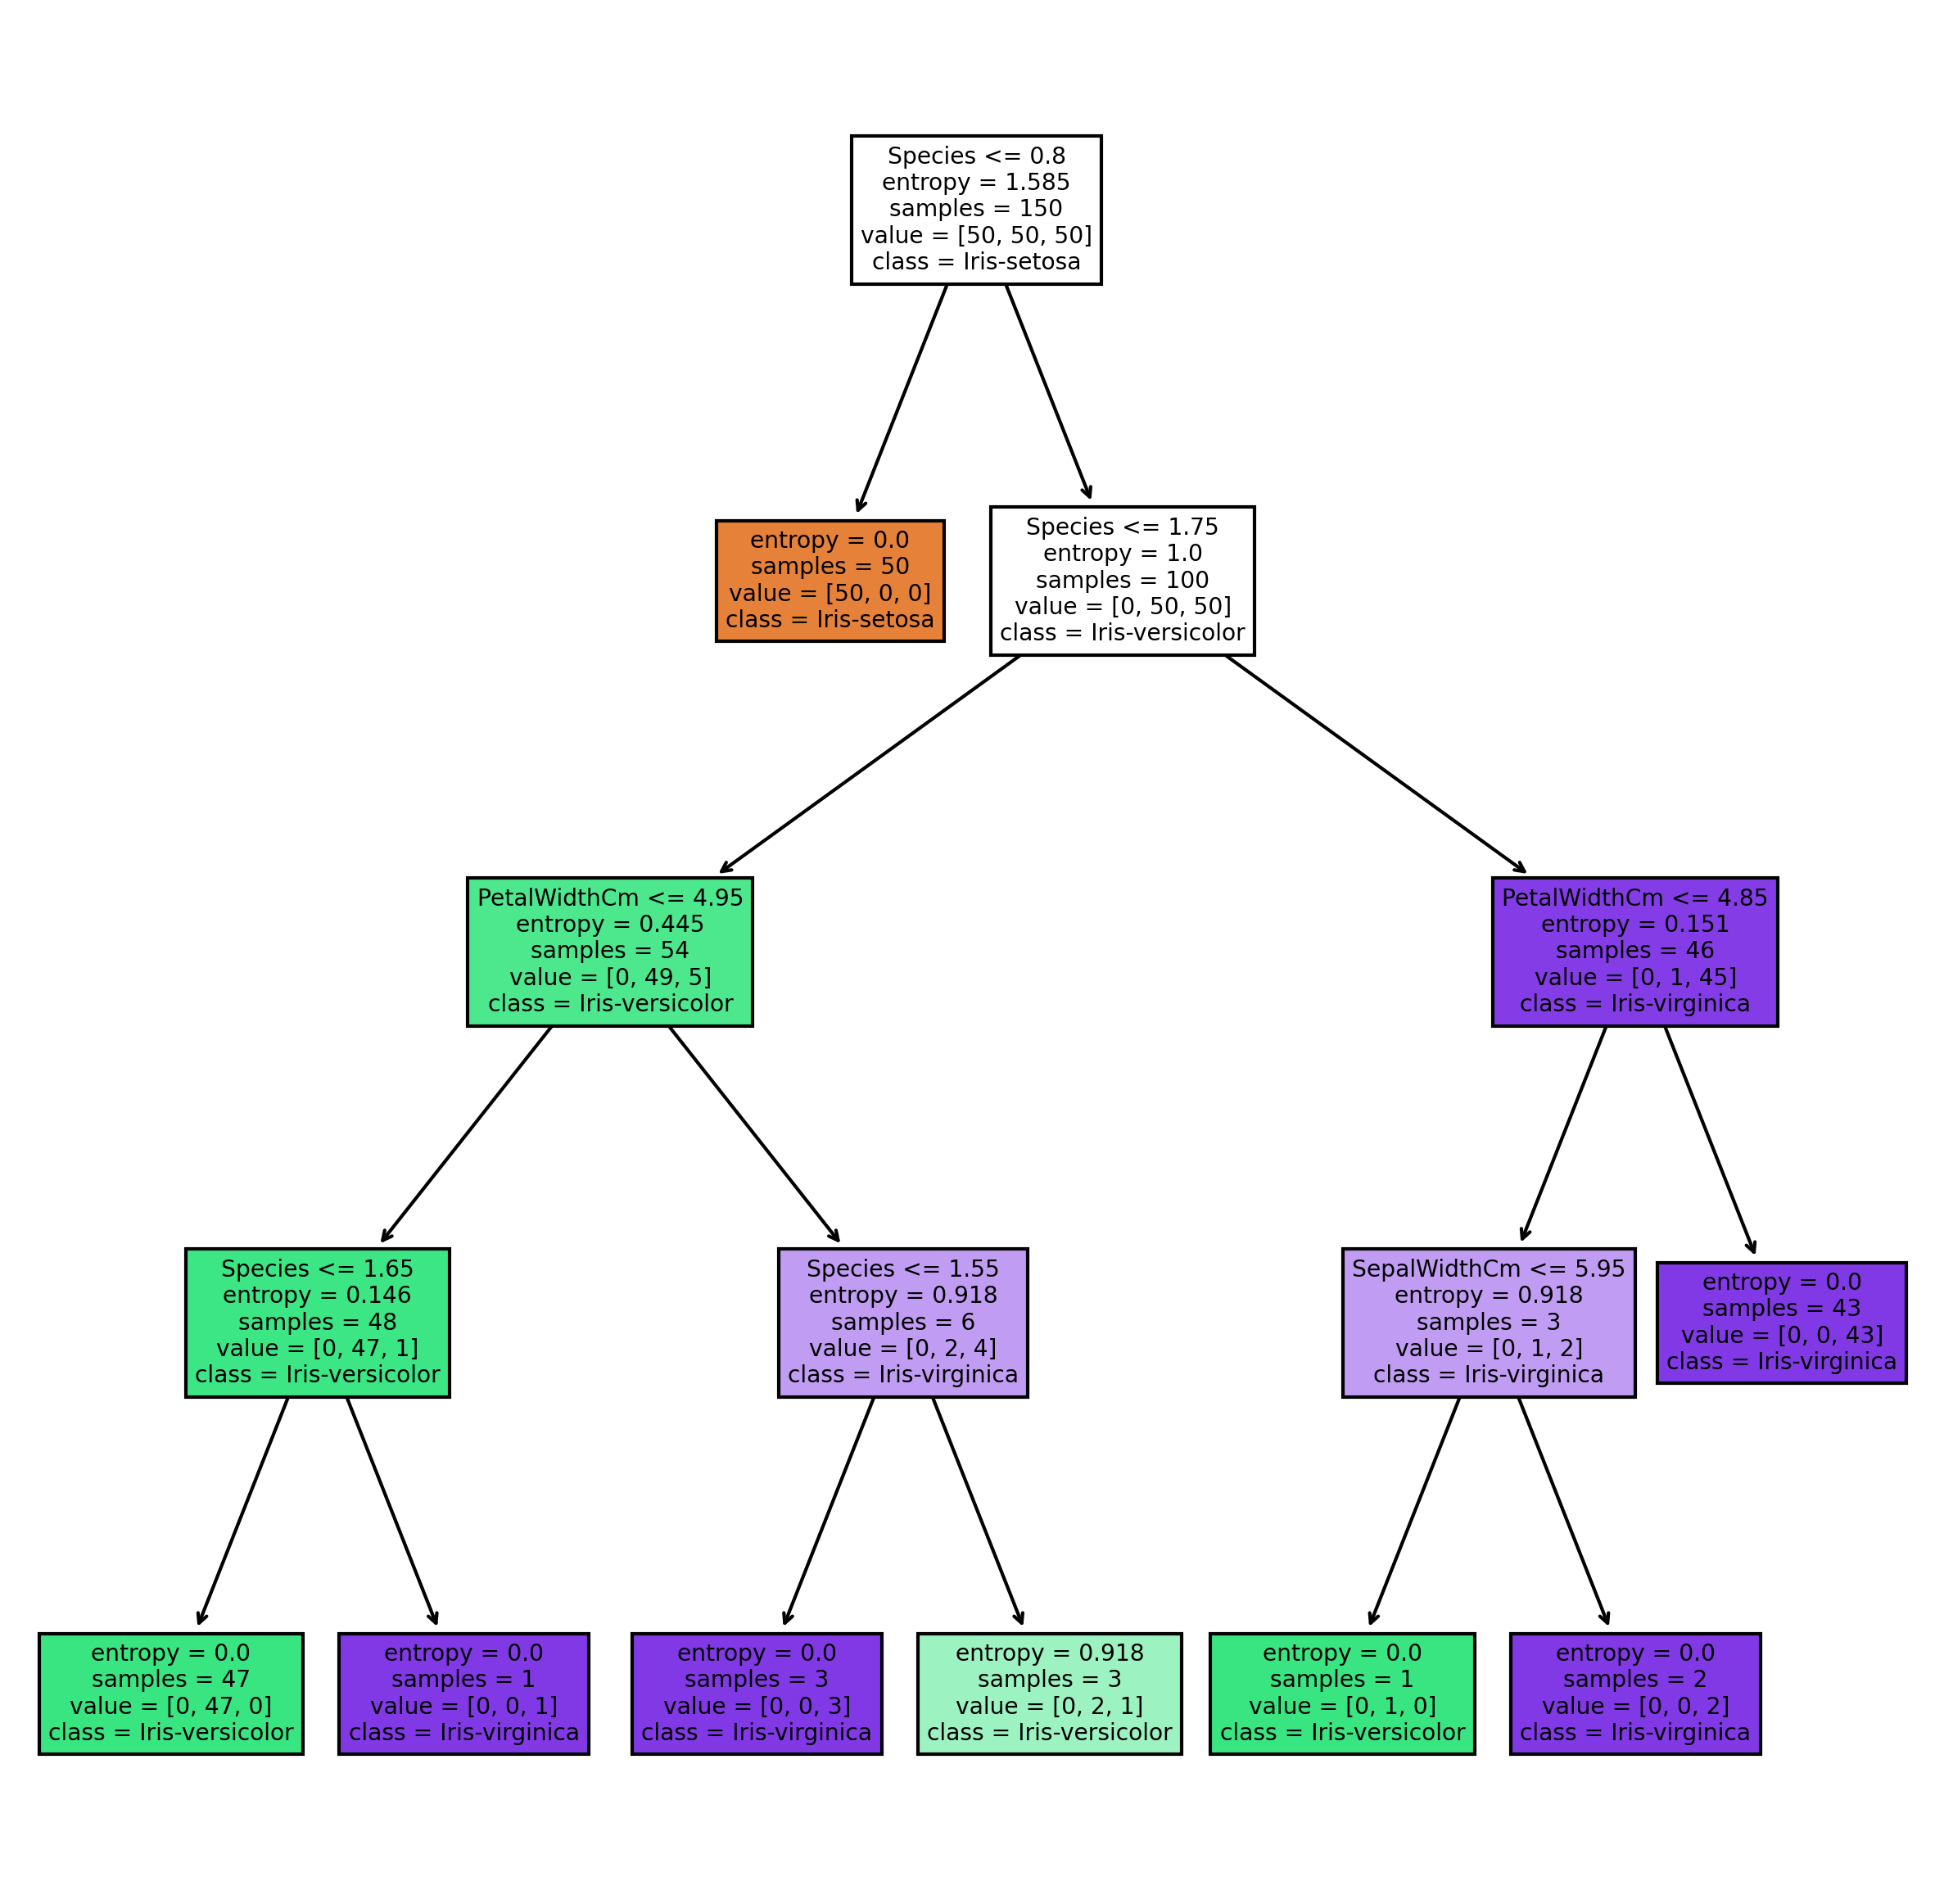

In [39]:
from sklearn import tree
x1 = df.columns[1:5]
y1 = df["Species"].unique().tolist()
classifier.fit(x,y)
fit, axes = plt.subplots(nrows=1,ncols=1, figsize =(10,10), dpi=300)
tree.plot_tree(classifier, feature_names = x1, class_names =y1, filled=True)


# Predicting the species for a random set of values
here we have given some random values for prediction and we have got the result as iris-setosa for our given values of sepellength, sepelwidt, petallength and petalwidth.

In [40]:
x_testing=[[5.4,2.0,1.4,0.1]]
predds = classifier.predict(x_testing)
predds

array(['Iris-setosa'], dtype=object)